In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("Customer Churn.csv")
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
(data == " ").sum()  

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

there are empty 11 row which don't have TotalCharges in there valuse , so need to  fill the missing values with the median of the column, as it is less sensitive to outliers than the mean.

In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8908\830575513.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [7]:
(data["TotalCharges"] == " ").sum()

0

In [8]:
data.isnull().sum().sum()

0

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
data["customerID"].duplicated().sum()

0

In [11]:
df = data

Now, we will keep only the relevant columns and remove those that are not useful. We will retain the columns that have a strong relationship with the target column (Churn) to improve the prediction.

In [12]:
churn_percentage = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_percentage)

Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338


In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

CustomerID – It is just a unique identifier and has no direct relation with churn prediction.

Gender – Gender doesn't have a strong impact on churn prediction, as there is no direct connection with the decision to churn.

In [14]:
df2 = data.drop(columns=['customerID', 'gender'])

In [15]:
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Now, we will perform exploratory data analysis (EDA) to better understand which features have high importance and which ones have minimal impact on predicting churn.

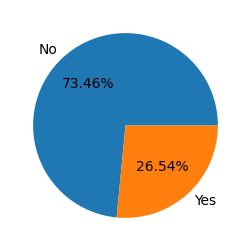

In [16]:
plt.figure(figsize=(4,3))
gr = data.groupby("Churn").agg({"Churn":"count"})
plt.pie(gr["Churn"],labels=gr.index ,autopct= "%1.2f%%" )
plt.show()

from the given charts we can conclude that 26.54 percentange of customers have churned out  it is not less than 20 percent so thats why this is not imblanced data set 

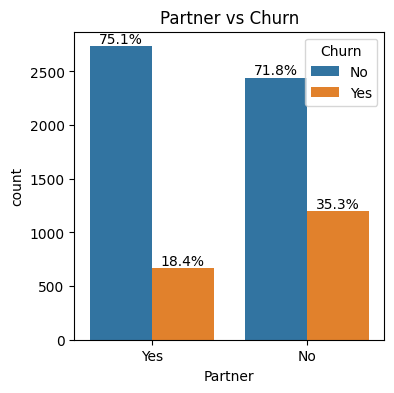

In [17]:
plt.figure(figsize=(4,4))
y = sns.countplot(x='Partner', hue='Churn', data=df)
total_counts = df.groupby('Partner').size()
for container in y.containers:
    labels = [f'{(v.get_height() / total_counts.loc[label]) * 100:.1f}%' for v, label in zip(container, total_counts.index)]
    y.bar_label(container, labels=labels)
plt.title("Partner vs Churn")
plt.show()

In [18]:
df2.sample(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2562,0,Yes,Yes,66,No,No phone service,DSL,No,No,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),50.55,3364.55,No
2739,0,Yes,No,61,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),101.15,6383.90,No
6319,1,Yes,No,54,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),24.95,1364.75,No


converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [19]:
def conv(value):
    if value == 1:
        return "yes"
    elif value == 0:
        return "No"
    else:
        return value 
data["SeniorCitizen"] = data["SeniorCitizen"].apply(conv)

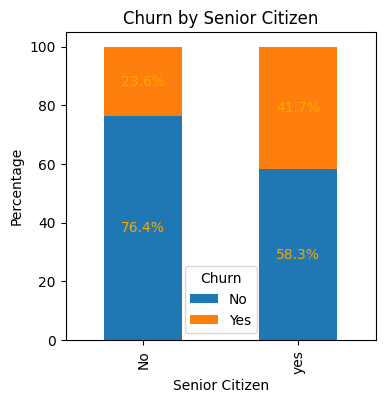

In [20]:
counts = data.groupby(['SeniorCitizen', 'Churn']).size().unstack()
percentages = counts.divide(counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(4, 4))

percentages.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

for container in ax.containers:
    heights = container.datavalues
    cumulative_heights = heights.cumsum()
    
    ax.bar_label(container, labels=[f'{h:.1f}%' for h in heights], color='orange', label_type='center')

plt.title('Churn by Senior Citizen')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen')
plt.legend(title='Churn')
plt.show()

A greater percentage of senior citizens have churned, which is why we will keep this feature in our model.

We need to examine the "Dependents" column in relation to the "Churn" column.

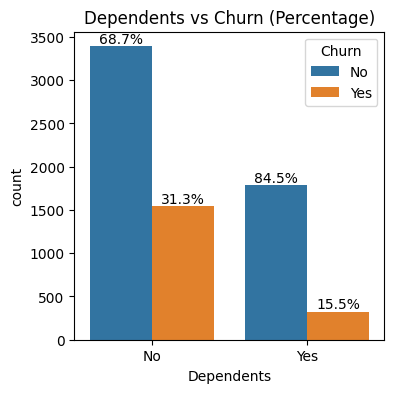

In [21]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Dependents', hue='Churn', data=df)

total_counts = df['Dependents'].value_counts()

for container in ax.containers:
    labels = [f'{(v.get_height() / total_counts[label]) * 100:.1f}%' for v, label in zip(container, total_counts.index)]
    ax.bar_label(container, labels=labels)

plt.title("Dependents vs Churn (Percentage)")
plt.show()

Customers who don’t have dependents tend to churn at a higher rate, suggesting that those without family responsibilities might be more likely to leave. On the other hand, customers with dependents show lower churn, perhaps due to more stability and longer-term commitments. This insight highlights that the "Dependents" feature could be an important factor in predicting churn. It adds meaningful context to understanding customer behavior.

Tenure refers to the number of months a customer has stayed with the company.

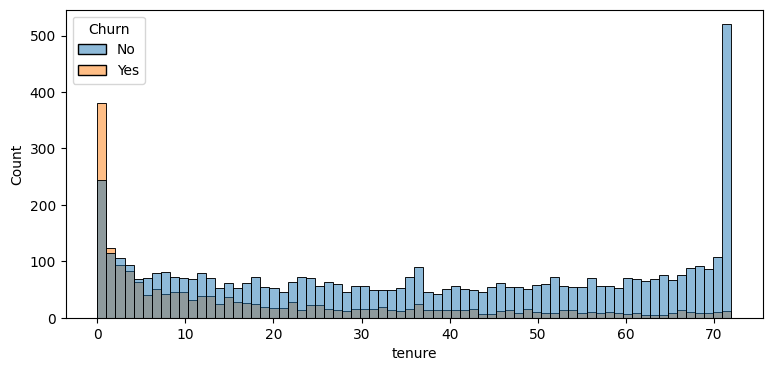

In [22]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure" ,data = data , bins =70 ,hue = "Churn")
plt.show()

Customers who have been with the company for a long time tend to stay, while those who churn usually do so within the first 1 to 5 months.

This indicates that customers who are likely to churn do so early in their subscription.

To retain these customers, the company could offer targeted incentives or personalized offers during the first few months to keep them engaged.

"Tenure" is a valuable feature for the churn prediction model as it can help identify customers who might leave early.

In [23]:
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


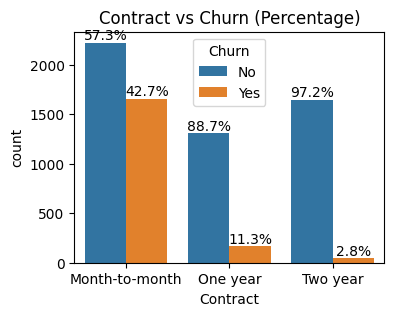

In [24]:
plt.figure(figsize=(4,3))
y = sns.countplot(data=data, x="Contract", hue="Churn")

total_counts = data["Contract"].value_counts().to_dict()

for container in y.containers:
    labels = [f"{(v.get_height() / total_counts[x.get_text()]) * 100:.1f}%" 
              for v, x in zip(container, y.get_xticklabels())]
    y.bar_label(container, labels=labels)

plt.title("Contract vs Churn (Percentage)")
plt.show()

From the analysis, we can see that customers who have a "month-to-month" contract are more likely to churn, while those with a "one year" or "two year" contract have a lower churn rate.

This suggests that the company could provide targeted offers to customers with "month-to-month" contracts to encourage them to stay and even consider switching to longer-term contracts, like one or two years.

The company could also offer incentives for customers to move to a longer-term contract during the initial months of their subscription.

"Contract" is a valuable feature for the churn prediction model as it helps in identifying the likelihood of churn based on the type of contract a customer holds.

In [25]:
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


I want to analyze the relationship of features like PhoneService , MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, and StreamingMovies , PaperlessBilling with the Churn target variable, and visualize them.

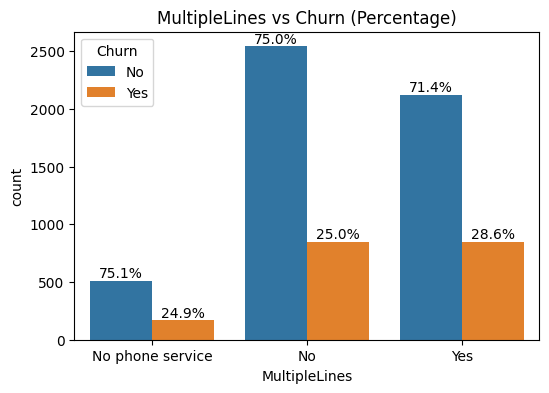

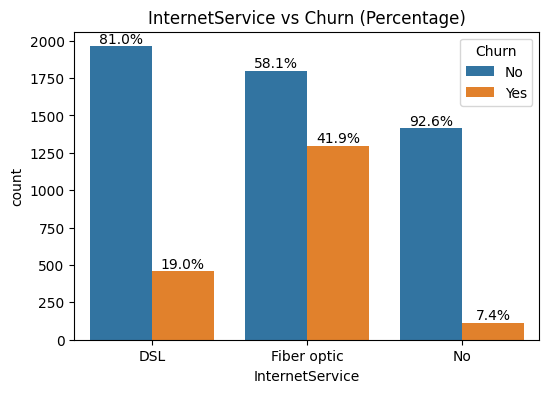

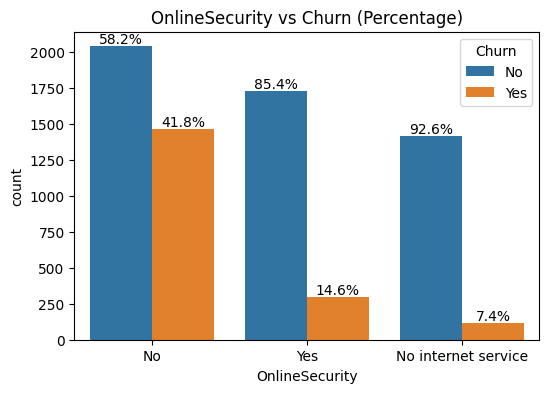

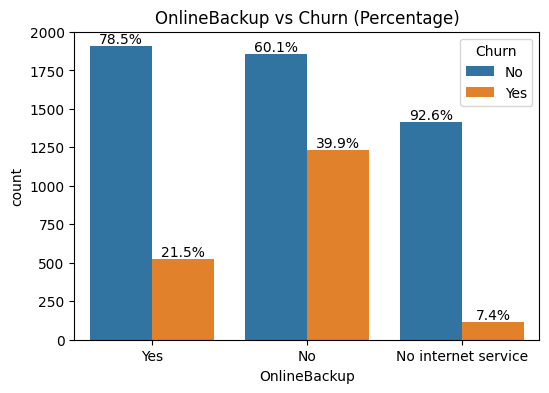

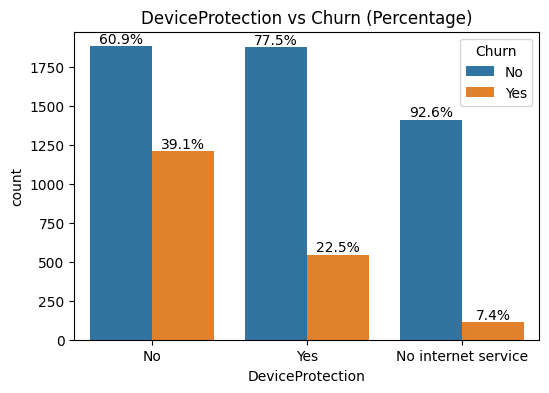

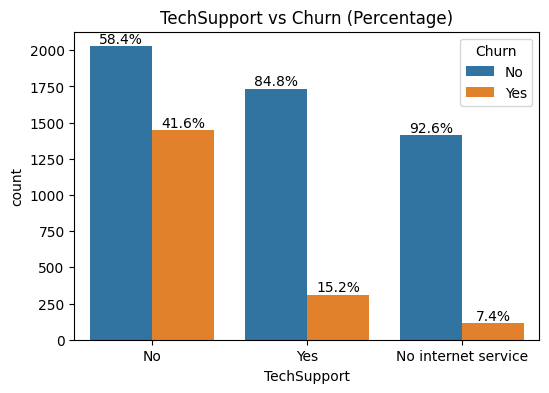

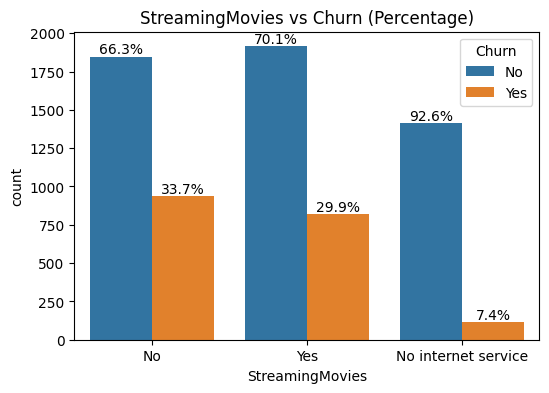

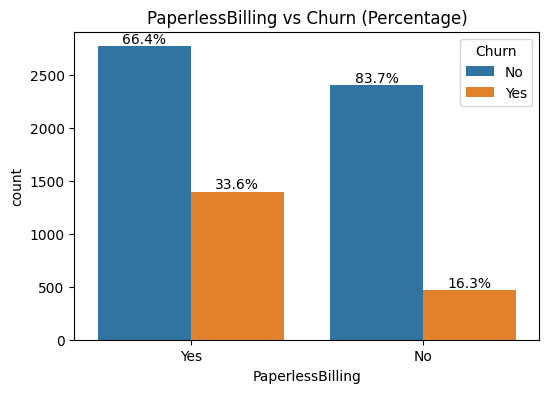

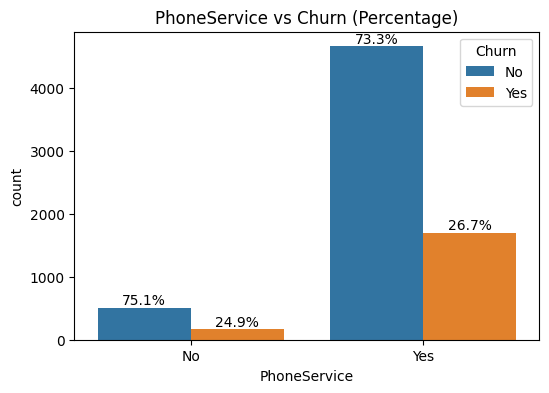

In [26]:
features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingMovies', 'PaperlessBilling', 'PhoneService']

for feature in features:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x=feature, hue='Churn', data=data)
    total_counts = data[feature].value_counts().to_dict()

    for container in ax.containers:
        labels = [f"{(v.get_height() / total_counts[x.get_text()]) * 100:.1f}%" 
                  for v, x in zip(container, ax.get_xticklabels())]
        ax.bar_label(container, labels=labels)

    plt.title(f'{feature} vs Churn (Percentage)')
    plt.show()

MultipleLines: Customers with multiple lines and those without phone service show the same churn rate, while customers with no phone service have a significantly lower churn rate.

InternetService: Customers with fiber optic internet have higher churn rates, whereas DSL users churn less, and those with no internet service show the lowest churn.

OnlineSecurity: Customers who did not opt for online security tend to churn more, while those who did, show lower churn rates.
Customers with no internet service have almost no churn.

OnlineBackup: Customers who did not take the online backup service are more likely to churn. Those who opted for it show a significantly lower churn rate, and customers with no internet service churn very little.

DeviceProtection: Customers who did not opt for device protection have a much higher churn rate, while those who subscribed to it have a lower churn rate. Customers with no internet service churned much less.

TechSupport: Customers without tech support churn significantly more, likely because they faced problems that were unresolved. Customers who had tech support churn less. Those with no internet service show minimal churn.

StreamingMovies: Customers without streaming movies tend to churn more, but those who have this service churn only a little. Customers with no internet service have a very low churn rate.

PaperlessBilling:those customers are having PaperlessBilling they churn more than ,who not do PaperlessBilling , so this feature is show some impact in model to predict the churn

PhoneService:those customers are using PhoneService they churned out higher than those who not using PhoneService , this is also a factor which do contribute in model to predict

All these features are important for churn prediction because they provide strong insights into customer behavior, especially in terms of whether they have opted for additional services.

# There is a big problem

these columns ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies'] have a value called "No phone service," when we apply one-hot encoding, they will be highly correlated because these are all independent columns. Therefore, we need to remove the columns that contain the "No phone service" value to avoid this issue.

But we don't delete the value of no phone services from column MultipleLines , because we need to have the impact of there value of no phone services , in one of them columns in ones we dont do that

In [27]:
columns_to_check = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingMovies']

for column in columns_to_check:
    df3 = df2[df2[column] != 'No internet service']

for column in columns_to_check:
    print(f"Value counts for {column}:")
    print(df3[column].value_counts())


Value counts for InternetService:
InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64
Value counts for OnlineSecurity:
OnlineSecurity
No     3498
Yes    2019
Name: count, dtype: int64
Value counts for OnlineBackup:
OnlineBackup
No     3088
Yes    2429
Name: count, dtype: int64
Value counts for DeviceProtection:
DeviceProtection
No     3095
Yes    2422
Name: count, dtype: int64
Value counts for TechSupport:
TechSupport
No     3473
Yes    2044
Name: count, dtype: int64
Value counts for StreamingMovies:
StreamingMovies
No     2785
Yes    2732
Name: count, dtype: int64


In [28]:
df3["MultipleLines"].value_counts()

MultipleLines
Yes                 2629
No                  2206
No phone service     682
Name: count, dtype: int64

In [29]:
df3.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


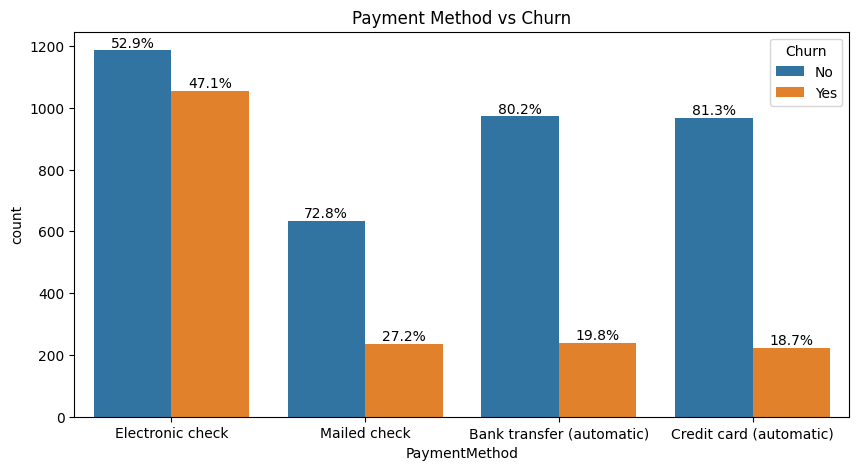

In [30]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df3, x="PaymentMethod", hue="Churn")

total_counts = df3["PaymentMethod"].value_counts().to_dict()

for container in ax.containers:
    labels = [f"{(v.get_height() / total_counts[x.get_text()]) * 100:.1f}%" 
              for v, x in zip(container, ax.get_xticklabels())]
    ax.bar_label(container, labels=labels)

plt.title("Payment Method vs Churn")
plt.show()

We observed that customers who use the "Electronic check" payment method have a higher churn rate, while those using other payment methods have a much lower churn rate.

First, we should check for outliers in the MonthlyCharges and TotalCharges columns, as these are numeric features, and outliers can affect the data.

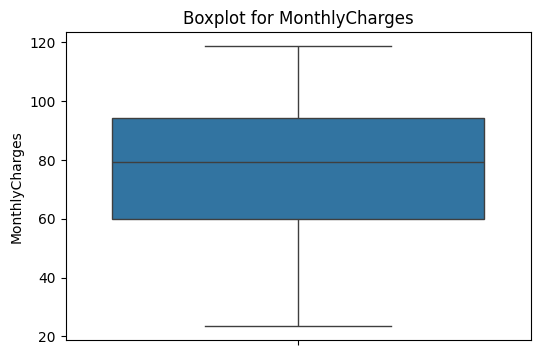

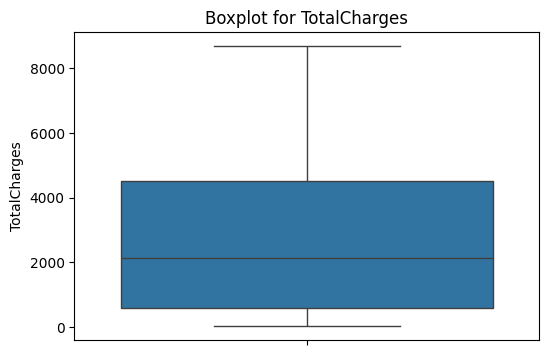

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df3['MonthlyCharges'])
plt.title('Boxplot for MonthlyCharges')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df3['TotalCharges'])
plt.title('Boxplot for TotalCharges')
plt.show()

Both columns, MonthlyCharges and TotalCharges, do not have any outliers, meaning the data in both is well within the expected range without extreme values.

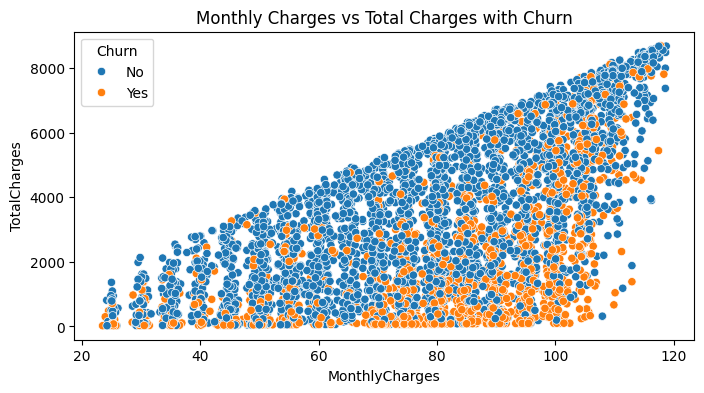

In [32]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df3)
plt.title('Monthly Charges vs Total Charges with Churn')
plt.show()

Churned customers (orange): These customers tend to have lower MonthlyCharges and TotalCharges, indicating that customers paying less are more likely to churn.

Non-churned customers (blue): These customers are more spread out, with a wider range of MonthlyCharges and TotalCharges, and many of them tend to pay higher amounts.

This suggests that customers who pay lower charges have a higher likelihood of churning, while those who pay more are less likely to churn. This relationship can be useful in predicting churn.

In [33]:
df3.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We will perform some feature engineering on the columns, such as converting categorical variables into numeric values using label encoding (for ordinal and nominal categories), and also encode the churn column into labels. This will allow us to explore the correlation with the target variable. Since we need to convert all features into numeric form for the model later, it makes sense to do this step now to observe the correlations. Further feature engineering will be done later.

Ordinal columns: Tenure, Contract .

Nominal columns: SeniorCitizen, Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingMovies, PaymentMethod , Partner, PhoneService , StreamingTV  , PaperlessBilling.

For Ordinal features, we will use Label Encoding, where we assign numerical labels to the values, such as for Tenure , churn and Contract.

For Nominal features, we will use One-Hot Encoding, where we convert each category into a separate column, such as for SeniorCitizen, Dependents, MultipleLines, etc.

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df3[[ 'Contract', 'Churn']] = df3[['Contract', 'Churn']].apply(label_encoder.fit_transform)

C:\Users\HP\AppData\Local\Temp\ipykernel_8908\1622249040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[[ 'Contract', 'Churn']] = df3[['Contract', 'Churn']].apply(label_encoder.fit_transform)


In [35]:
df3.sample(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1117,0,No,No,52,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,2,Yes,Credit card (automatic),89.45,4577.75,0
3756,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,0,Yes,Mailed check,24.45,24.45,1
1259,1,No,No,46,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,1,No,Credit card (automatic),95.25,4424.20,1
5528,0,Yes,No,44,Yes,No,DSL,Yes,Yes,No,Yes,No,No,1,Yes,Bank transfer (automatic),59.85,2603.95,0
5183,1,Yes,Yes,34,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,0,Yes,Mailed check,79.60,2718.30,1


We will first convert the tenure feature into three categories: Low tenure (0-12 months), Medium tenure (12-24 months), and High tenure (24+ months). After that, we will apply label encoding on this categorical feature.

In [36]:
bins = [0, 12, 24, float('inf')]
labels = ['Low', 'Medium', 'High']

# Assigning the tenure categories
df3['tenure'] = pd.cut(df3['tenure'], bins=bins, labels=labels, right=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_8908\1250387960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['tenure'] = pd.cut(df3['tenure'], bins=bins, labels=labels, right=False)


In [37]:
df3.sample(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
455,0,No,No,High,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,0,Yes,Electronic check,104.15,2494.65,0
1868,0,No,No,Low,Yes,No,DSL,No,No,No,No,No,No,0,Yes,Bank transfer (automatic),44.05,44.05,0
341,0,Yes,No,High,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,2,No,Credit card (automatic),85.75,6223.80,0


In [38]:
from sklearn.preprocessing import OneHotEncoder

nominal_columns = ['SeniorCitizen', 'Dependents', 'MultipleLines', 'InternetService', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingMovies', 'PaymentMethod', 'Partner', 'PhoneService', 'StreamingTV' , 'PaperlessBilling']

encoder = OneHotEncoder(drop='first', dtype=int)
encoded_array = encoder.fit_transform(df3[nominal_columns])
encoded_df = pd.DataFrame(encoded_array.toarray(), columns=encoder.get_feature_names_out(nominal_columns))
df3 = df3.drop(columns=nominal_columns).join(encoded_df)

In [39]:
df3.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,PhoneService_Yes,StreamingTV_Yes,PaperlessBilling_Yes
0,Low,0,29.85,29.85,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,High,1,56.95,1889.50,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Low,0,53.85,108.15,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,High,1,42.30,1840.75,0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Low,0,70.70,151.65,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [40]:
encoder = LabelEncoder()
df3['tenure'] = encoder.fit_transform(df3['tenure'])

In [41]:
df3.head(3)

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,PhoneService_Yes,StreamingTV_Yes,PaperlessBilling_Yes
0,1,0,29.85,29.85,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,1,56.95,1889.50,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0,53.85,108.15,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


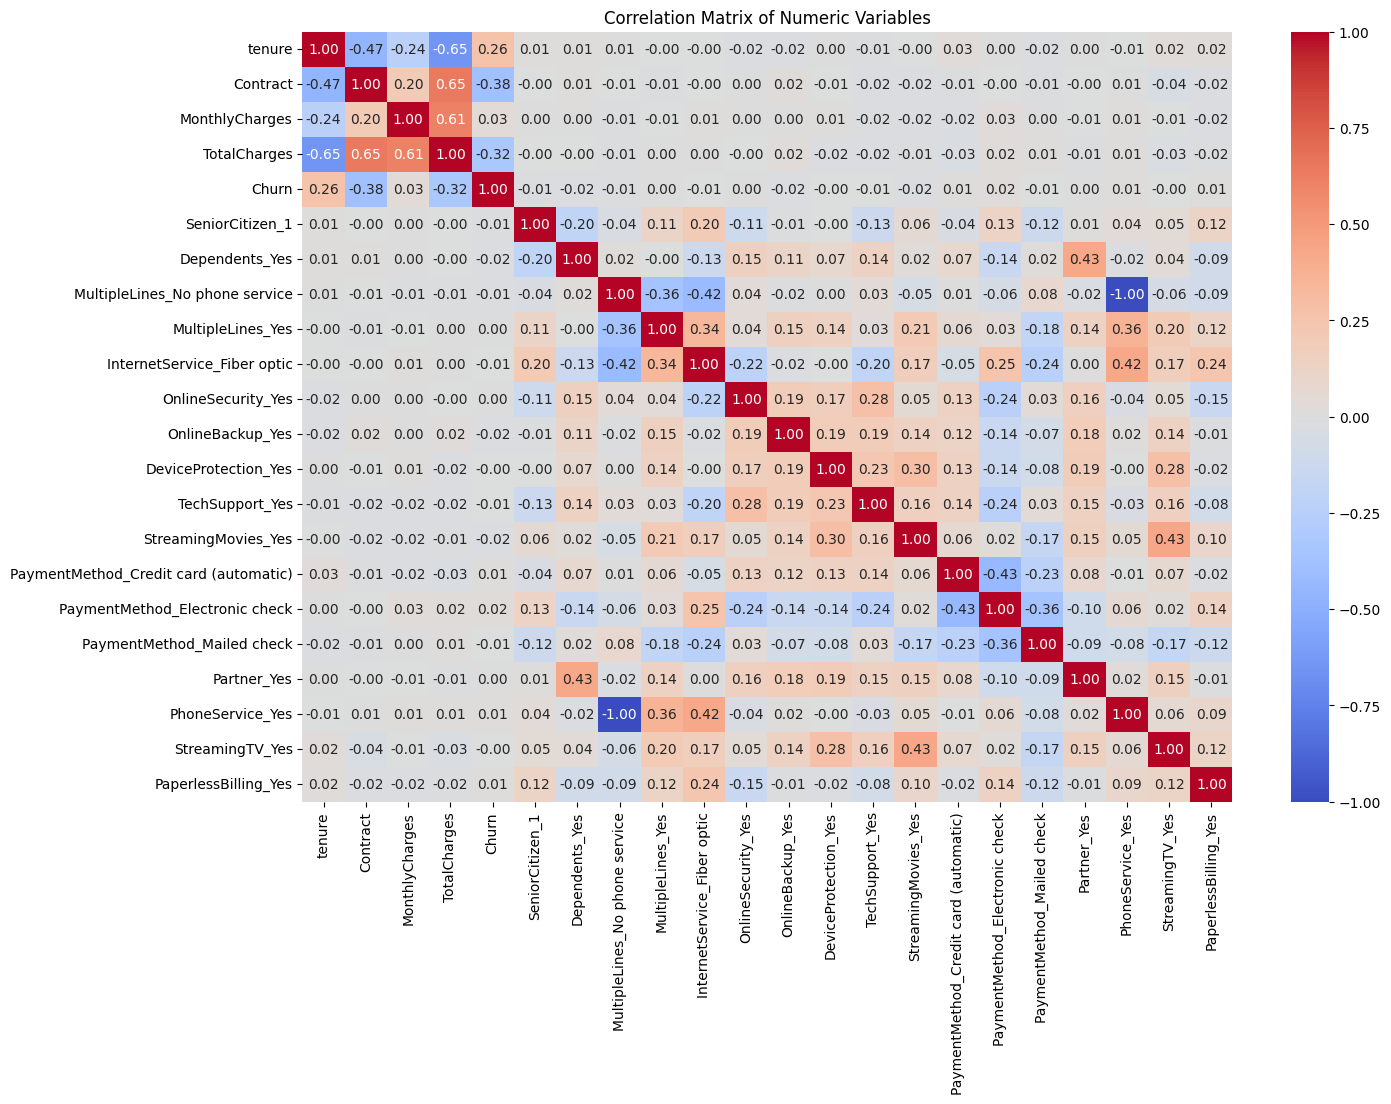

In [42]:
df_numeric = df3.select_dtypes(include=['number'])
# Correlation matrix
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In a classification problem, generally, you would consider dropping an independent column if its correlation with another independent variable is above 0.7 or 0.8 (depending on the context), indicating a strong positive or negative relationship, as this can lead to issues like multicollinearity and hinder model interpretation. 

The correlation between Contract and Monthly is 0.20.
The correlation between Contract and Total is 0.65.
The correlation between Contract and Churn is -0.38.
The correlation between Monthly and Total is 0.61.
The correlation between Monthly and Churn is 0.03.
The correlation between Total and Churn is -0.32.
To remove an independent column due to correlation, the correlation between the columns should ideally be 0.8 or higher. If the correlation is below 0.8, like in our case (the highest is 0.65), it may be fine to keep both columns in the model as they do not show significant multicollinearity.

    
Additionally, there are other correlations that are in the 40s, which are also relatively low, and they don’t pose a major risk for multicollinearity.

                                                                                                                               
However, once we evaluate the model's performance, we will apply backward elimination to check the impact of keeping or removing these columns on performance. This will help decide whether these columns should be kept or removed for better model efficiency.

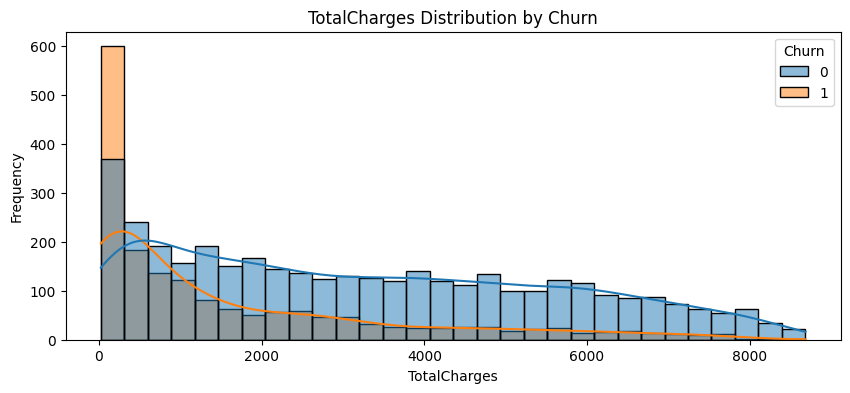

In [43]:
plt.figure(figsize=(10, 4))
sns.histplot(df3, x='TotalCharges' , hue='Churn', kde=True, bins=30)
plt.title('TotalCharges Distribution by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()

Customers with TotalCharges less than 2000 have a higher chance of churning.

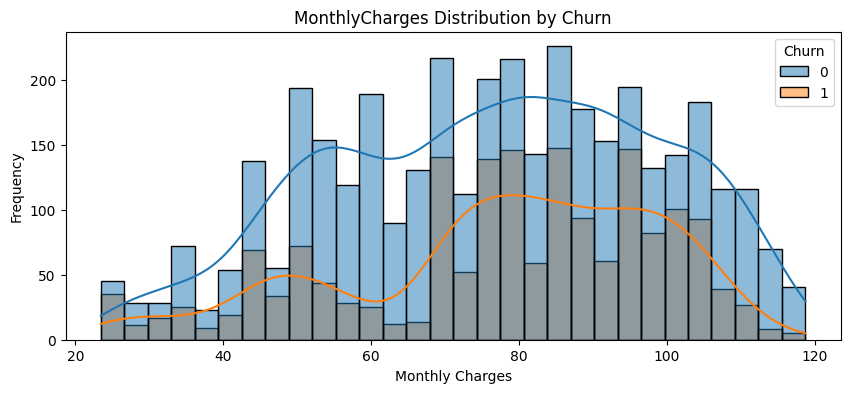

In [44]:
plt.figure(figsize=(10, 4))
sns.histplot(df3, x='MonthlyCharges' , hue='Churn', kde=True, bins=30)
plt.title('MonthlyCharges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

You can say that the difference in MonthlyCharges between churned and non-churned customers isn't significant, but there might be a slight impact. Since the correlation between MonthlyCharges and churn is 0.03, which is quite low, its impact is minimal. Therefore, we can keep this column as well.

In [45]:
df3

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,PhoneService_Yes,StreamingTV_Yes,PaperlessBilling_Yes
0,1,0,29.85,29.85,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,1,56.95,1889.50,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0,53.85,108.15,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,1,42.30,1840.75,0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,70.70,151.65,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,84.80,1990.50,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,0,1,103.20,7362.90,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,1,0,29.60,346.45,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,1,0,74.40,306.60,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df3.isnull().sum()

tenure                                      0
Contract                                    0
MonthlyCharges                              0
TotalCharges                                0
Churn                                       0
SeniorCitizen_1                          1192
Dependents_Yes                           1192
MultipleLines_No phone service           1192
MultipleLines_Yes                        1192
InternetService_Fiber optic              1192
OnlineSecurity_Yes                       1192
OnlineBackup_Yes                         1192
DeviceProtection_Yes                     1192
TechSupport_Yes                          1192
StreamingMovies_Yes                      1192
PaymentMethod_Credit card (automatic)    1192
PaymentMethod_Electronic check           1192
PaymentMethod_Mailed check               1192
Partner_Yes                              1192
PhoneService_Yes                         1192
StreamingTV_Yes                          1192
PaperlessBilling_Yes              

Null values occur when data is missing or unavailable for certain rows or columns, often due to encoding.

Many columns have null values, each having 1192 rows with missing data, which is quite a lot. However, these columns are valuable for the model, so we will fill them with the median since they have binary outcomes (0 or 1). Afterward, we will check the correlation again to see the impact.

In [47]:
columns_with_nulls = [
    'SeniorCitizen_1', 'Dependents_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
    'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingMovies_Yes',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check', 'Partner_Yes', 'PhoneService_Yes', 'StreamingTV_Yes',
    'PaperlessBilling_Yes'
]

for column in columns_with_nulls:
    median_value = df3[column].median()  
    df3[column].fillna(median_value, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8908\3818167719.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3[column].fillna(median_value, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8908\3818167719.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [48]:
df3.isnull().sum().sum()

0

In [49]:
df3

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,PhoneService_Yes,StreamingTV_Yes,PaperlessBilling_Yes
0,1,0,29.85,29.85,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,1,56.95,1889.50,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0,53.85,108.15,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,1,42.30,1840.75,0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,70.70,151.65,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,84.80,1990.50,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7039,0,1,103.20,7362.90,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7040,1,0,29.60,346.45,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7041,1,0,74.40,306.60,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


MonthlyCharges and TotalCharges should be scaled to ensure uniformity in feature magnitudes, preventing it from dominating the model due to its larger numerical range

MinMaxScaler is better for MonthlyCharges and TotalCharges because it keeps the original distribution and scales values between 0 and 1, making it useful for models like logistic regression and tree-based models.

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df3[['MonthlyCharges' , 'TotalCharges']] = scaler.fit_transform(df3[['MonthlyCharges' ,'TotalCharges']])
df3.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,PhoneService_Yes,StreamingTV_Yes,PaperlessBilling_Yes
0,1,0,0.067156,0.000739,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,1,0.351522,0.215446,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0,0.318993,0.009779,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,1,0.197796,0.209817,0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0.495803,0.014801,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# Our data is now ready for model building.

First, we will separate the independent and dependent features.

In [51]:
X = df3.drop('Churn', axis=1)  # Independent features
y = df3['Churn']  # Dependent feature

In [52]:
X.shape , y.shape

((5517, 21), (5517,))

# We need to predict whether a customer will churn or not, as it is a classification problem.

Now, we will split the data into training and test sets to evaluate the model's performance on unseen data. This will help us understand how well our model generalizes and whether it can predict churn accurately on new data.

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4413, 21), (1104, 21), (4413,), (1104,))

We will start with logistic regression, and if the results are not satisfactory, we will explore other algorithms.

In [54]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

LogisticRegression()

In [55]:
from sklearn.metrics import accuracy_score
y_train_pred = LRmodel.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.75


In [56]:
y_test_pred = LRmodel.predict(X_test)
# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.75


In [57]:
from sklearn.metrics import confusion_matrix
# Confusion matrix for test data
y_test_pred = LRmodel.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[645  97]
 [175 187]]


We will check type2 error for our logistic regression model and compare it with other models.

For us, a Type 2 error, meaning a False Negative (FN), is more significant because it indicates that customers who are likely to churn are being incorrectly classified as non-churn, potentially leading to missed opportunities for retention strategies.


We need a model that minimizes the False Negative (FN) errors, as it is crucial to accurately identify customers who are likely to churn

we see type 2 error for every model ,which model get low type 2 error and also improved accuracy from LRmodel





In [58]:
from sklearn.ensemble import RandomForestClassifier

#RandomForestClassifier bydefault takes 100 decision trees
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Training Accuracy with Random Forest: {train_accuracy_rf:.2f}")

Training Accuracy with Random Forest: 1.00


In [59]:
y_test_pred_rf = rf_model.predict(X_test)
# Calculate test accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy with Random Forest: {test_accuracy_rf:.2f}")

Test Accuracy with Random Forest: 0.74


Random Forest is overfitting, as we see a high training accuracy (0.99) and a relatively lower test accuracy (0.72). Therefore, we will perform hyperparameter tuning to improve the model.

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150 , 200 , 250 , 300],  # Number of trees
    'max_depth': [5, 6, 8 , 9, 10], 
    'min_samples_split': [8 , 10, 12, 14],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],   
    'max_features': ['auto', 'sqrt', 'log2']  
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


KeyboardInterrupt: 

In [87]:
# Using the best parameters found from GridSearchCV
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=4,
    max_features='sqrt',
    min_samples_leaf=3,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Training Accuracy with Random Forest: {train_accuracy_rf:.2f}")

Training Accuracy with Random Forest: 0.77


In [88]:
y_test_pred_rf = rf_model.predict(X_test)

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy with Random Forest: {test_accuracy_rf:.2f}")

Test Accuracy with Random Forest: 0.75


In [89]:
y_test_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[670  72]
 [202 160]]


Now, we will use Gradient Boosting to further improve the performance.









In [90]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_clf.fit(X_train, y_train)

y_train_pred = gb_clf.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")

Train Accuracy: 0.7870


In [91]:
y_test_pred = gb_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(conf_matrix)

Test Accuracy: 0.7681
[[660  82]
 [174 188]]


In [135]:
gbc = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [100, 200, 250 ,300 ],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_leaf': [1, 2,3, 4 ,5],
    'max_depth': [3, 4, 5 , 6]
}

grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 200}


In [102]:
best_params = {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 190}
gbc = GradientBoostingClassifier(**best_params)
gbc.fit(X_train, y_train)

train_preds = gbc.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.7808746884205756


In [103]:
y_test_pred = gbc.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(conf_matrix)

Test Accuracy: 0.7645
[[657  85]
 [175 187]]


We chose Gradient Boosting because it has the lowest Type 2 error FN = 174 while maintaining the highest overall accuracy. Since Type 2 error is critical, reducing it helps in correctly identifying churn cases. Additionally after hyperparameter tuning Gradient Boosting still performed the best making it the most reliable choice for our model.